In [71]:
import numpy as np
# import matplotlib.pyplot as plt
import math
import scipy.special as sp
from scipy.optimize import fsolve

# from numpy.polynomial.legendre import Legendre

np.set_printoptions(precision=20)

#Parameters
pr = 10
L0 = 5
# SIGMA_r = 1
A0 = 0.002
# r0 = 2
px = 5
N = (pr+1)*(px+1)

##COLLOCATION POINTS

#collocation points for r
k_full = np.arange(0, 2*pr + 4)
x__col = np.cos(np.pi * k_full / (2*pr + 3)) 
r_col_prel = L0 * x__col / np.sqrt(1 - x__col**2)
r_col = r_col_prel[pr+1:0:-1] 
# print('rcol=', r_col)


#collocation points for x
gegen_roots, _ = sp.roots_gegenbauer( 2 * px + 3 - 1,3/2)
gegen_col_prel = np.sort(gegen_roots)
x_col =  np.flip(-gegen_col_prel[:px + 1])
# print('x_col=', x_col)
# np.savetxt('x_col_6030', x_col, fmt='%.16f') #confere


rcol= [ 0.3420093696028987  1.0390119480659348  1.7770004268985138
  2.590791175457199   3.5293853974830394  4.669674021124831
  6.145825614945094   8.222149707359327  11.5111545234407
 17.845233714590552  36.377701610916695 ]
x_col= [0.11633186888370387 0.3427240133427128  0.550639402928647
 0.7288685990913262  0.8678010538303473  0.959935045267261  ]


C:\Users\vivil\AppData\Local\Temp\ipykernel_7304\3133420822.py:31: RuntimeWarning: divide by zero encountered in divide
  r_col_prel = L0 * x__col / np.sqrt(1 - x__col**2)


In [66]:
######### 2n+1 #########
##BASES
#r basis

def SB(n, r):
    res = np.sin((n + 1) * ((np.pi / 2) - np.arctan(r / L0)))
    return res

def rSB(n, r):
    res = - np.cos((n + 1) * ((np.pi / 2) - np.arctan(r / L0))) * (n + 1) / (L0 * (1 + (r / L0)**2))
    return res

def rrSB(n, r):
    res = (2 * np.cos((n + 1) * (np.pi / 2 - np.arctan(r / L0))) *
           (n + 1) * r / (L0**3 * (1 + (r / L0)**2)**2)
           - np.sin((n + 1) * (np.pi / 2 - np.arctan(r / L0))) *
           (n + 1)**2 / (L0**2 * (1 + (r / L0)**2)**2))
    return res


# #x basis
def P(i, x):
    return sp.legendre(i)(x)

def xP(i,x):
    return sp.legendre(i).deriv()(x)

def xxP(i,x):
    return sp.legendre(i).deriv().deriv()(x)
    

In [73]:
#collocation points on the bases
# r basis
SB_ = np.zeros([pr+1,pr+1])
SB_r = np.zeros([pr+1,pr+1])
SB_rr = np.zeros([pr+1,pr+1])

for i in range(pr+1):
    SB_[i,] = SB(2 * i,r_col)
# np.savetxt('SB_col', SB_.T, fmt='%.16f') 

for i in range(pr+1):
    SB_r[i,] = rSB(2 * i,r_col)
# np.savetxt('SBr', SB_r, fmt='%.16f') 

for i in range(pr+1):
    SB_rr[i,] = rrSB(2 * i,r_col)
# np.savetxt('SBrr', SB_rr, fmt='%.16f')


# #pi basis
# SBpi = np.zeros([pr+1, pr+1])

# for k in range(pr+1):
#     SBpi[k,] = (2*k+1) / (2*k+3)* (np.sin((2*k+2+1)*np.arctan(L0/r_col))) - (np.sin((2*k+1)*np.arctan(L0/r_col)))

# psipi = SBpi.T


#x basis
P_ = np.zeros((px + 1, px + 1))
P_x = np.zeros((px + 1, px + 1))
P_xx = np.zeros((px + 1, px + 1))

for i in range(px + 1):
    P_[i,] = P(2*i,x_col)
# np.savetxt('P_col', P_.T, fmt='%.16f') #confere
    
for i in range(px + 1):
    P_x[i,] = xP(2*i,x_col)
# np.savetxt('Px', P_x, fmt='%.16f') #confere
    
for i in range(px + 1):
    P_xx[i,] = xxP(2*i,x_col)
# np.savetxt('Pxx', P_xx, fmt='%.16f') #confere

P= [[ 1.                   -0.4797003444230371    0.32505211997864925
  -0.22725888837926556   0.1499056821927674   -0.08354685723512262 ]
 [ 1.                   -0.3238103760173961   -0.005113091847087747
   0.21010219623522786  -0.2783504640655805    0.21830672883263516 ]
 [ 1.                   -0.04519437191357478  -0.35980931594561466
   0.2697881976087913    0.07512245065719678  -0.26616353605054965 ]
 [ 1.                    0.29687415211202856  -0.38244679691066835
  -0.2178504339266881    0.25797818777666603   0.19900655598202216 ]
 [ 1.                    0.6296180035435921    0.03213772378231866
  -0.3696084246618133   -0.3452968157107882   -0.020142874705834507]
 [ 1.                    0.8822129366983877    0.634353273985883
   0.3141748313846191   -0.005627918852448843 -0.2560938240835609  ]]


In [68]:
###### TOTAL BASIS ######

def repelem(arr, repeats):
    """
    Replicates MATLAB's repelem behavior for N-dimensional arrays.
    
    Parameters:
        arr (numpy.ndarray): Input array.
        repeats (tuple): Number of repetitions along each axis.
    
    Returns:
        numpy.ndarray: Repeated array.
    """
    for axis, rep in enumerate(repeats):
        arr = np.repeat(arr, rep, axis=axis)
    return arr


#r --> tile, x-->repelem     ###transposta inverte###
#np.kron(tile,repelem)     ###transposta inverte###

# L = 5
Psi   = repelem(SB_.T, (px+1, px+1))  * np.tile(P_.T, (pr+1, pr+1))
rPsi   = (repelem(SB_r.T, (px+1, px+1)) * np.tile(P_.T, (pr+1, pr+1))) #/L0
rrPsi  = (repelem(SB_rr.T, (px+1, px+1)) * np.tile(P_.T, (pr+1, pr+1))) #/L0**2
xPsi   = repelem(SB_.T, (px+1, px+1))  * np.tile(P_x.T, (pr+1, pr+1))
xxPsi  = repelem(SB_.T, (px+1, px+1))  * np.tile(P_xx.T, (pr+1, pr+1))


# Psi    = np.kron(SB_.T,P_.T)
# rPsi   = np.kron(SB_r.T,P_.T)/L0
# rrPsi  = np.kron(SB_rr.T,P_.T)/L0**2
# xPsi   = np.kron(SB_.T,P_x.T)
# xxPsi  = np.kron(SB_.T,P_xx.T)
# np.savetxt('Psi_repelem6030', Psi, fmt='%.18f')


#inverse matrix
inv_psi = np.linalg.inv(Psi)
# np.savetxt('invpsi_repelem6030', inv_psi, fmt='%.18f')

# inv_psipi = np.linalg.inv(psipi)


Text(0.5, 0, 'phi0_approx')

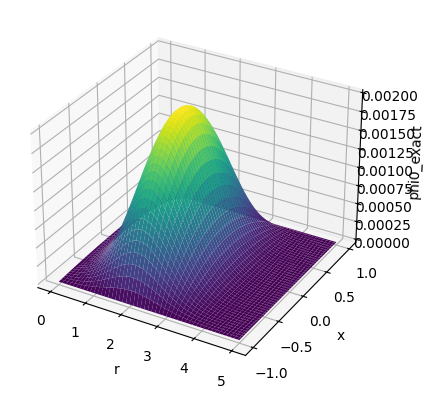

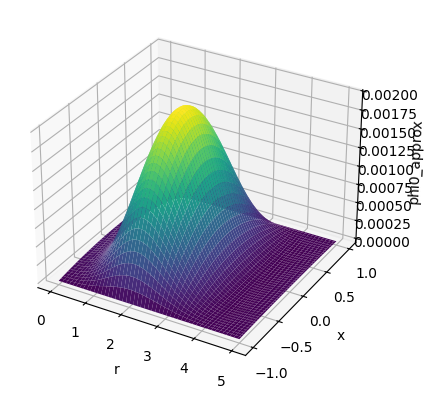

In [70]:
#initial data
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#intervalos
r_plot = np.linspace(0, 5, 100) 
x_plot = np.linspace(-1, 1, 100)
Rplot, Xplot = np.meshgrid(r_plot,x_plot)

R = np.repeat(r_col, px + 1)
X = np.tile(x_col, pr + 1)


# r0 = 5
def gaussian_exact(A0,r,x):
    return A0 * np.exp(-(r-2)**2) * (1 - x**2)
# np.exp(-r**2) * (1 - x**2)

gaussian_col = gaussian_exact(A0,R,X)


# coef_col = [gaussian_exact(A0, r_col[j], x_col[k])
                         # for j in range(N + 1) for k in range(px + 1)]

a0 = np.dot(inv_psi, gaussian_col)

def Psi_plot(n, r, x):
    list = [SB(2 * i, r) * P(2 * j, x)
            for i in range(pr + 1) for j in range(px + 1)]
    return list[n]

def gaussian_approx(r,x,b):
    res = sum(b[k] * Psi_plot(k,r,x) for k in range((pr+1) * (px+1)))
    return res
              
Z = gaussian_exact(A0,Rplot,Xplot)
Y = gaussian_approx(Rplot,Xplot,a0)
# # W = Z - Y


# # ### PLOTS #####

# fig1 = plt.figure()
# ax1 = plt.axes(projection = '3d')
# ax1.plot_surface(Rplot, Xplot, Z, cmap='viridis')
# ax1.set_xlabel('r')
# ax1.set_ylabel('x')
# ax1.set_zlabel('phi0_exact')
# # plt.savefig('exact_phi_trunc121.png', dpi=300, bbox_inches='tight')

# fig2 = plt.figure()
# ax2 = plt.axes(projection = '3d')
# ax2.plot_surface(Rplot, Xplot, Y, cmap='viridis')
# ax2.set_xlabel('r')
# ax2.set_ylabel('x')
# ax2.set_zlabel('phi0_approx')
# # plt.savefig('approx_phi_trunc121.png', dpi=300, bbox_inches='tight')

# # # fig3 = plt.figure()
# # # ax3 = plt.axes(projection = '3d')
# # # ax3.plot_surface(Rplot, Xplot, W, cmap='viridis')
# # # ax3.set_xlabel('r')
# # # ax3.set_ylabel('x')
# # # ax3.set_zlabel('erro')
# # # # plt.savefig('exact_phi_trunc121.png', dpi=300, bbox_inches='tight')


In [7]:
# 'QUADRATURE ENERGY'

# from numpy.polynomial.legendre import Legendre

# Nqr = int(3/2*pr)
# Nqx = int(3/2*px)
# M = Nq + 1
# # L0 = 5
# Pquad = Legendre.basis(Nq+1)       
# dP = Pquad.deriv()           
# xq = Pquad.roots()

# #weights
# w = 2 / ((1 - xq**2) * (dP(xq)**2))  
# # np.savetxt('wqcol_N200L1_teste2', w_col, fmt='%.18e')

# rq= L0 * (1 + xq) / (1 - xq)

# ###############quadrature
# SBqua = np.zeros([Nq+1, M]) #+1
# rSBqua = np.zeros([Nq+1, M])
# rrSBqua = np.zeros([Nq+1, M])

# for i in range(Nq):
#     SBqua[i,] = np.sin((2*i+1)*np.arctan(L0/rq))

# for i in range(Nq):
#     rSBqua[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

# for i in range(Nq):
#     rrSBqua[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)
#     +2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))
#     -2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)

# SBq = SBqua[0:(pr+1),:]
# # psiq = psiplotpew.T
# # np.savetxt('psiq_N200L1_teste3', psiq, fmt='%.18e')
# # print('shape psi=', psiq.shape)
# rSBq = rSBqua[0:(pr+1),:]
# # rpsiq = rpsiplotpew.T  #/L0
# # np.savetxt('rpsiq_N200L1_teste3', rpsiq, fmt='%.18e')
# # print('rpsiplot=', rpsiq.shape)
# rrSBq = rrSBqua[0:(pr+1), :]
# # rrpsiq = rrpsiplotpew.T #/L0**2


# ###pi
# SBpiqua = np.zeros([Nq+1, M])
# for k in range(Nq+1):
#     SBpiqua[k,] = (2*k+1) / (2*k+3)* (np.sin((2*k+2+1)*np.arctan(L0/rq))) - (np.sin((2*k+1)*np.arctan(L0/rq)))

# SBpiq = SBpiqua[0:(N+1), :]
# # psipiq = psipiq.T


# # #x basis
# def P(i, x):
#     return sp.legendre(i)(x)

# def xP(i,x):
#     return sp.legendre(i).deriv()(x)

# def xxP(i,x):
#     return sp.legendre(i).deriv().deriv()(x)

# Pqua = np.zeros([Nq+1, M]) #+1
# xPqua = np.zeros([Nq+1, M])
# xxPqua = np.zeros([Nq+1, M])

# for i in range(Nq):
#     Pqua[i,] = P(2*i,xq)
# # np.savetxt('P_col', P_.T, fmt='%.16f') #confere
    
# for i in range(Nq):
#     xPqua[i,] = xP(2*i,xq)
# # np.savetxt('Px', P_x, fmt='%.16f') #confere
    
# for i in range(Nq):
#     xxPqua[i,] = xxP(2*i,xq)
# # np.savetxt('Pxx', P_xx, fmt='%.16f') #confere

# Pq = Pqua[0:(px+1),:]
# # psiq = psiplotpew.T
# # np.savetxt('psiq_N200L1_teste3', psiq, fmt='%.18e')
# # print('shape psi=', psiq.shape)
# xPq = xPqua[0:(px+1),:]
# # rpsiq = rpsiplotpew.T  #/L0
# # np.savetxt('rpsiq_N200L1_teste3', rpsiq, fmt='%.18e')
# # print('rpsiplot=', rpsiq.shape)
# xxPq = xxPqua[0:(px+1), :]
# # rrpsiq = rrpsiplotpew.T #/L0**2

# # Psiq   = repelem(SBq.T, (px+1, px+1))  * np.tile(Pq.T, (N+1, N+1))
# # rPsiq   = (repelem(rSBq.T, (px+1, px+1)) * np.tile(Pq.T, (N+1, N+1))) #/L0
# # rrPsiq  = (repelem(rrSBq.T, (px+1, px+1)) * np.tile(Pq.T, (N+1, N+1))) #/L0**2
# # xPsiq   = repelem(SBq.T, (px+1, px+1))  * np.tile(xPq.T, (N+1, N+1))
# # xxPsiq  = repelem(SBq.T, (px+1, px+1))  * np.tile(xxPq.T, (N+1, N+1))

# Psiq   = np.kron(Pq.T, SBq.T) 
# print(Psiq.shape)# shape: ((N+1)*(px+1), Nq+1)
# rPsiq  = np.kron(Pq.T, rSBq.T)
# rrPsiq = np.kron(Pq.T, rrSBq.T)
# xPsiq  = np.kron(xPq.T, SBq.T)
# xxPsiq = np.kron(xxPq.T, SBq.T)



(8281, 1891)


In [12]:
# 'PLOT'

# G = 1000
# rplot = np.linspace(0.000001,10,G)
# xplot = np.linspace(0.000001,5,G)

# SBp = np.zeros([N+1, G])
# rSBp = np.zeros([N+1, G])
# rrSBp = np.zeros([N+1, G])

# for i in range(N+1):
#     SBp[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

# for i in range(N+1):
#     rSBp[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2))

# for i in range(N+1):
#     rrSBp[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)
#     +2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))
#     -2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)
    
# SBplot = SBp[0:(N+1), :]
# # psiplot = psiplotp.T
# # print('shape psi=', psiplot.shape)
# rSBplot = rSBp[0:(N+1), :]
# # rpsiplot = rpsiplotp.T  #/L0
# # print('rpsiplot=', rpsiplot.shape)
# rrSBplot = rrSBp[0:(N+1), :]
# # rrpsiplot = rrpsiplotp.T #/L0**2
# # np.savetxt('psiplot_N60', psiplot, fmt='%.18e')
# # np.savetxt('rpsiplot_N60', rpsiplot, fmt='%.18e')

# # # print("np.dot(a0, psiplot) shape:", np.dot(a0, psiplot).shape)

# # #x basis
# def P(i, x):
#     return sp.legendre(i)(x)

# def xP(i,x):
#     return sp.legendre(i).deriv()(x)

# def xxP(i,x):
#     return sp.legendre(i).deriv().deriv()(x)

# Pp = np.zeros([Nq+1, G]) #+1
# xPp = np.zeros([Nq+1, G])
# xxPp = np.zeros([Nq+1, G])

# for i in range(N+1):
#     Pp[i,] = P(2*i,xplot)
# # np.savetxt('P_col', P_.T, fmt='%.16f') #confere
    
# for i in range(N+1):
#     xPp[i,] = xP(2*i,xplot)
# # np.savetxt('Px', P_x, fmt='%.16f') #confere
    
# for i in range(N+1):
#     xxPp[i,] = xxP(2*i,xplot)
# # np.savetxt('Pxx', P_xx, fmt='%.16f') #confere

# Pplot = Pp[0:(px+1),:]
# # psiq = psiplotpew.T
# # np.savetxt('psiq_N200L1_teste3', psiq, fmt='%.18e')
# # print('shape psi=', psiq.shape)
# xPplot = xPp[0:(px+1),:]
# # rpsiq = rpsiplotpew.T  #/L0
# # np.savetxt('rpsiq_N200L1_teste3', rpsiq, fmt='%.18e')
# # print('rpsiplot=', rpsiq.shape)
# xxPplot = xxPp[0:(px+1), :]
# # rrpsiq = rrpsiplotpew.T #/L0**2

# Psiplot   = np.kron(Pplot.T, SBplot.T)    
# rPsiplot  = np.kron(Pplot.T, rSBplot.T)
# rrPsiplot = np.kron(Pplot.T, rrSBplot.T)
# xPsiplot  = np.kron(xPplot.T, SBplot.T)
# xxPsiplot = np.kron(xxPplot.T, SBplot.T)



In [63]:
import time

t0 = time.process_time()

r = np.repeat(r_col, px + 1)  # shape: ( (N+1)*(px+1), )
x = np.tile(x_col, pr + 1)

def RHS(c):
    phi_r = np.dot(rPsi, c)
    phi_rr = np.dot(rrPsi, c)
    phi_x = np.dot(xPsi, c)
    phi_xx = np.dot(xxPsi, c)
    
    term1 = phi_rr
    term2 = (2 / r) * phi_r
    term3 = ((1 - x**2) / r**2) * phi_xx
    term4 = (2 * x / r**2) * phi_x
    
    rhs = term1 + term2 + term3 - term4
    return rhs


b0 = np.zeros(N)

h = 0.001
tf = 7
It = int(tf/h)
t = np.linspace(0, tf, It)

# Phicenter = (-1) ** np.arange(N)
# phic = np.zeros(It)

# 'RK modes'

# for i in range(It):    

#     #first stanza
#     # a = np.dot(inv_psi, gaussian_col)
#     PI = np.dot(Psi, b0)
#     dphi = PI
#     da1 = np.dot(inv_psi, dphi)

#     # phic[i] = np.dot(Phicenter, a0)

#     phi = np.dot(Psi, a0)
#     dPI = RHS(a0)
#     db1 = np.dot(inv_psi, dPI)
    
#     # # phi_setq[i,:] = np.dot(psiq, a)
#     # drphi_setq[i,:] = np.dot(rPsiq, a)
#     # pi_setq[i,:]  = np.dot(Psipiq, b0)
#     # # pi_setq[i,:]  = np.dot(psipiq, b)

#     # #energy
#     # rho = 0.5 * np.pi * (rq + L0)**2 * (pi_setq[i,:]**2 + drphi_setq[i,:]**2) * rq**2 / (2 * L0) 
#     # # energia = 4 * np.dot(integrando, w)
#     # energy_set[i] = 4 * np.dot(rho,w)

#  #second stanza
#     newa = a0 + 0.5*h*da1
#     newb = b0 + 0.5*h*db1

#     PI = np.dot(Psi, newb)
#     dphi = PI
#     da2 = np.dot(inv_psi, dphi)
#     dPI = RHS(newa)
#     db2 = np.dot(inv_psi, dPI)

#     #third stanza
#     newa = a0+0.5*h*da2
#     newb = b0+0.5*h*db2

#     PI = np.dot(Psi, newb)
#     dphi = PI
#     da3 = np.dot(inv_psi, dphi)
#     dPI = RHS(newa)
#     db3 = np.dot(inv_psi, dPI)

#     #fourth stanza
#     newa = a0 + h*da3
#     newb = b0 + h*db3

#     PI = np.dot(Psi, newb)
#     dphi = PI
#     da4 = np.dot(inv_psi, dphi)
#     dPI = RHS(newa)
#     db4 = np.dot(inv_psi, dPI)
    
#     a0 = a0 + 1/6 * h*da1 + 1/3 * h*da2 + 1/3 * h*da3 + 1/6 * h*da4
#     b0 = b0 + 1/6 * h*db1 + 1/3 * h*db2 + 1/3 * h*db3 + 1/6 * h*db4

#     phic[i] = np.dot(Phicenter, a0)

#     # phi_set[i,:] = np.dot(psiplot, a)
#     # drphi_set[i,:] = np.dot(rpsiplot, a)
#     pi_set[i,:]  = np.dot(psipi_plot, b)

PI = np.zeros(N)
phi = gaussian_col
phic = np.zeros(It)

Phicenter = (-1) ** np.arange(N)

'RK values'

for i in range(It):    

    #first stanza
    dphi1 = PI
    # a = a0
    phic[i] = np.dot(Phicenter, a0)
    
    dPI1 = RHS(a0)
    
    # # phi_setq[i,:] = np.dot(psiq, a)
    # drphi_setq[i,:] = np.dot(rPsiq, a0)
    # pi_setq[i,:]  = np.dot(Psipiq, b0)
    # # pi_setq[i,:]  = np.dot(psipiq, b)

    # #energy
    # rho = 0.5 * np.pi * (rq + L0)**2 * (pi_setq[i,:]**2 + drphi_setq[i,:]**2) * rq**2 / (2 * L0) 
    # # energia = 4 * np.dot(integrando, w)
    # energy_set[i] = 4 * np.dot(rho,w)

 #second stanza
    newphi = phi+0.5*h*dphi1
    newPI = PI+0.5*h*dPI1

    dphi2 = newphi
    a0 = np.dot(inv_psi, newphi)
    # print(a0.shape)
    dPI2 = RHS(a0)

    #third stanza
    newphi = phi+0.5*h*dphi2
    newPI = PI+0.5*h*dPI2

    dphi3 = newPI
    a0 = np.dot(inv_psi, newphi)
    dPI3 = RHS(a0)

    #fourth stanza
    newphi = phi+h*dphi3
    newPI = PI+h*dPI3

    dphi4 = newPI
    a0 = np.dot(inv_psi, newphi)
    dPI4 = RHS(a0)

    phi = phi+1/6*h*dphi1+1/3*h*dphi2+1/3*h*dphi3+1/6*h*dphi4
    PI = PI+1/6*h*dPI1+1/3*h*dPI2+1./3*h*dPI3+1/6*h*dPI4

    # phi_set[i,:] = np.dot(psiplot, a)
    # drphi_set[i,:] = np.dot(rpsiplot, a)
    # pi_set[i,:]  = np.dot(psipi_plot, b)


print("Saving results in txt files")

# np.savetxt('phic_pr20px10_L5', phic, fmt='%.16e')
# np.savetxt('energy_N400L5_rk_modes', energy_set, fmt='%.16e')
# np.savetxt('a_N60P30L5_newrk', a, fmt='%.16e')
# np.savetxt('a0_sphercoor_2000_L5', a_set, fmt='%.15e')
   
t1 = time.process_time()
print('Running time (basis):', t1 - t0, 's')        

(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)
(231,)

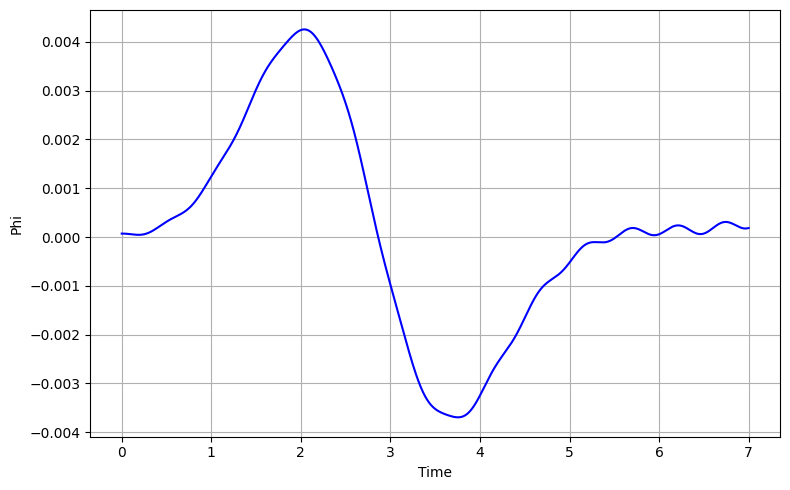

In [64]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.001        
tf = 7
It = int(tf / h) 
t = np.linspace(0, tf, It)

# phic_H = np.loadtxt('phic.txt')
phi_HH = phic_H[:,1]
phic = np.loadtxt('phic_pr20px10_L5')

plt.figure(figsize=(8, 5))
plt.plot(t, phic, label='Phi center', color='blue')
# plt.axhline(exact_energy, color='r', linestyle='--', label='Analytical energy')
plt.xlabel('Time')
plt.ylabel('Phi')
# plt.title('E/t')
plt.grid(True)
# plt.legend()
plt.tight_layout()
# plt.savefig("energy_N400L5_rk_modes", dpi=300)
plt.show()

In [ ]:
# 'anatytical energy'

# import numpy as np
# from sympy import symbols, exp, diff, lambdify
# from scipy.integrate import quad

# A0 = 0.002
# # r0 = 
# # sigma_r = 1

# # integrando = r**2 * (dphi_dr**2 + (1 - x**2)/r**2 * dphi_dx**2)

# r = symbols('r')
# x = symbols('x')
# Phi = A0 * np.exp(-r**2) * (1 - x**2)
# dPhi = diff(Phi, r)

# dPhi_numeric = lambdify(r, dPhi, modules='numpy')

# def integrand(r_val):
#     return 2 * np.pi * r_val**2 * dPhi_numeric(r_val)**2

# integral, erro =  quad(integrand, 0, np.inf)

# print(f'exato = {integral:.18e}')
# # print(f'erro estimado = {erro:.1e}')

# # print('exato=',integral)

In [74]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# from mpl_toolkits.mplot3d import Axes3D
# import scipy.special as sp

# t0 = time.process_time()

# plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'  #Ajuste o caminho se necessário
# %matplotlib notebook 

# data = np.loadtxt('resultados_a0_2010.txt')
# times = data[:, 0]  #time column
# all_a0 = data[:, 1:]  #a0 
# r_min, r_max = 0.1, 5.0
# x_min, x_max = -1, 1


# #grid
# r_vals = np.linspace(r_min, r_max, 30)
# x_vals = np.linspace(x_min, x_max, 30)
# R, X = np.meshgrid(r_vals, x_vals)

# #psi para plot 3d
# total_coeffs = (N+1)*(px+1)
# Psi_grid = np.zeros((total_coeffs, *R.shape))

# for k in range(total_coeffs):
#     # Vectorize manualmente para cada k
#     for i in range(R.shape[0]):
#         for j in range(R.shape[1]):
#             Psi_grid[k,i,j] = Psi_plot(k, R[i,j], X[i,j])

# #phi
# phi_evolution = np.zeros((len(times), *R.shape))

# for t_idx in range(len(times)):
#     #Produto vetorizado: a0[t_idx] • Psi_grid
#     phi_evolution[t_idx] = np.sum(all_a0[t_idx][:,None,None] * Psi_grid, axis=0)


# #3D animation
# fig = plt.figure(figsize=(12, 8))
# ax = fig.add_subplot(111, projection='3d')

# ax.set_xlabel('r')
# ax.set_ylabel('x')
# ax.set_zlabel('ϕ(r,x,t)')
# ax.set_zlim(np.min(phi_evolution), np.max(phi_evolution))

# #initial frame
# t_idx = 0
# surf = ax.plot_surface(R, X, phi_evolution[t_idx], 
#                       cmap='viridis', 
#                       rstride=1, cstride=1)
# ax.set_title(f'Tempo = {times[t_idx]:.3f}')

# #atualização da função
# def update(frame):
#     global surf
    
#     t_idx = min(frame*5, len(times)-1)
    
#     if surf:
#         surf.remove()
    
#     surf = ax.plot_surface(R, X, phi_evolution[t_idx], 
#                          cmap='viridis',
#                          rstride=1, cstride=1)
#     ax.set_title(f'Tempo = {times[t_idx]:.3f}')
#     return surf

# #animação
# ani = FuncAnimation(fig, update, 
#                    frames=len(times)//5,
#                    interval=200,  
#                    blit=False,   
#                    repeat=True)

# plt.tight_layout()
# plt.show()

# #salvar como gif
# ani.save("evolucao_phi_2010.gif", writer='pillow', fps=13, dpi=100)

# t1 = time.process_time()
# print('Running time (basis):', t1 - t0, 's')    

In [15]:
'Evolution phi_r code'

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# import time

# t0 = time.process_time()

# # Configurações
# plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
# %matplotlib notebook

# # Carrega os dados
# data = np.loadtxt('resultados_a0_2010_.txt')
# times = data[:, 0]
# all_a0 = data[:, 1:]

# # Parâmetros do grid em r
# r_min, r_max = -5.0, 5.0
# r_vals = np.linspace(r_min, r_max, 100)

# # Pré-calcula φ(r, x=0) para todos os tempos
# phi_r_evolution = np.zeros((len(times), len(r_vals)))

# for t_idx in range(len(times)):
#     for r_idx, r in enumerate(r_vals):
#         # Substitui Psi_plot por SB(2*i, r) com x=0 fixo
#         sum_val = 0.0
#         n = 0
#         for i in range(N+1):
#             for j in range(px+1):
#                 sum_val += all_a0[t_idx, n] * SB(2*i, r)
#                 n += 1
#         phi_r_evolution[t_idx, r_idx] = sum_val

# # Configuração da figura
# fig_r = plt.figure(figsize=(10, 6))
# ax_r = fig_r.add_subplot(111)
# line_r, = ax_r.plot([], [], lw=2, color='blue')
# ax_r.set_xlim(r_min, r_max)
# ax_r.set_ylim(np.min(phi_r_evolution), np.max(phi_r_evolution))
# ax_r.set_xlabel('r')
# ax_r.set_ylabel('φ(r, x=0, t)')
# ax_r.grid(True)

# # Animação
# def init_r():
#     line_r.set_data([], [])
#     return line_r,

# def update_r(frame):
#     t_idx = min(frame, len(times)-1)
#     line_r.set_data(r_vals, phi_r_evolution[t_idx])
#     ax_r.set_title(f'φ(r, x=0) - Tempo = {times[t_idx]:.3f}')
#     return line_r,

# ani_r = FuncAnimation(fig_r, update_r, frames=len(times),
#                     init_func=init_r, blit=True, interval=50)

# plt.tight_layout()
# plt.show()

# # Salvar
# ani_r.save("phi_vs_r.gif", writer='pillow', fps=15, dpi=120)

# t1 = time.process_time()
# print(f'Tempo execução (φ vs r): {t1-t0:.2f}s')

In [16]:
'Evolution phi_x code'

# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.animation import FuncAnimation
# import time

# t0 = time.process_time()

# # Configurações
# plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
# %matplotlib notebook

# # Carrega os dados
# data = np.loadtxt('resultados_a0_2010_.txt')
# times = data[:, 0]
# all_a0 = data[:, 1:]

# # Parâmetros do grid em x
# x_min, x_max = -1, 1
# x_vals = np.linspace(x_min, x_max, 100)

# # Pré-calcula φ(r_min, x) para todos os tempos
# phi_x_evolution = np.zeros((len(times), len(x_vals)))

# for t_idx in range(len(times)):
#     for x_idx, x in enumerate(x_vals):
#         # Substitui Psi_plot por P(2*j, x) com r=r_min fixo
#         sum_val = 0.0
#         n = 0
#         for i in range(N+1):
#             for j in range(px+1):
#                 sum_val += all_a0[t_idx, n] * SB(2*i, 0) * P(2*j, x)
#                 n += 1
#         phi_x_evolution[t_idx, x_idx] = sum_val

# # Configuração da figura
# fig_x = plt.figure(figsize=(10, 6))
# ax_x = fig_x.add_subplot(111)
# line_x, = ax_x.plot([], [], lw=2, color='red')
# ax_x.set_xlim(x_min, x_max)
# ax_x.set_ylim(np.min(phi_x_evolution), np.max(phi_x_evolution))
# ax_x.set_xlabel('x')
# ax_x.set_ylabel(f'φ(r={r_min}, x, t)')
# ax_x.grid(True)

# # Animação
# def init_x():
#     line_x.set_data([], [])
#     return line_x,

# def update_x(frame):
#     t_idx = min(frame, len(times)-1)
#     line_x.set_data(x_vals, phi_x_evolution[t_idx])
#     ax_x.set_title(f'φ(r={r_min}, x) - Tempo = {times[t_idx]:.3f}')
#     return line_x,

# ani_x = FuncAnimation(fig_x, update_x, frames=len(times),
#                     init_func=init_x, blit=True, interval=50)

# plt.tight_layout()
# plt.show()

# # Salvar
# ani_x.save("phi_vs_x_wSB.gif", writer='pillow', fps=15, dpi=120)

# t1 = time.process_time()
# print(f'Tempo execução (φ vs x): {t1-t0:.2f}s')

In [17]:
# import sympy as spm

# A0 = 0.002
# L0 = 1.0  

# #exact energy

# r, x = spm.symbols('r x', real=True, positive=True)

# #derivatives
# phi = A0 * spm.exp(-r**2) * (1 - spm.cos(x)**2)
# dphi_dr = spm.diff(phi, r)
# # print(dphi_dr)
# dphi_dx = spm.diff(phi, x)
# # print(dphi_dx)

# #integral
# integrando = r**2 * (dphi_dr**2 + (1 - x**2)/r**2 * dphi_dx**2)

# #x
# integral_x = spm.integrate(integrando, (x, -1, 1))

# #r
# integral_r = spm.integrate(integral_x, (r, 0, spm.oo))

# #total
# H = spm.pi * integral_r
# H_eval = H.evalf()
# # print(f"H = {H_eval}")
# print('energia exata=', H_eval)


energia exata= 6.25771093683232e-6
